In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [25]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [26]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [31]:
inertia = []
k_range = range(1,11)

In [34]:
for k in k_range:
  kmeans = KMeans(n_clusters =k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

In [35]:
inertia

[1000.0000000000002,
 297.8954141051722,
 11.57548472310498,
 9.75206797735684,
 8.257175272446283,
 6.917577320416799,
 6.334755391595288,
 5.70417717790143,
 5.060234133532077,
 4.762361898130397]

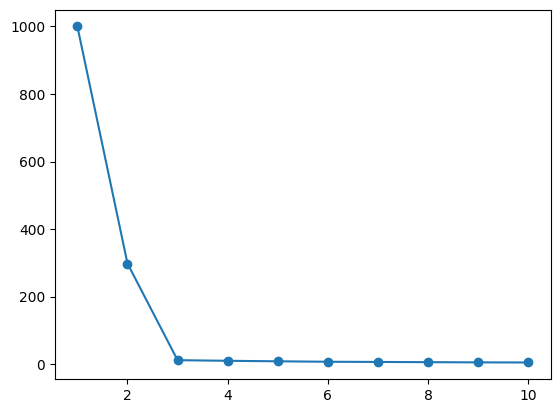

In [38]:
plt.plot(k_range, inertia, marker='o')

In [41]:
kmeans_final = KMeans(n_clusters = 3, random_state = 42)

In [ ]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [43]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

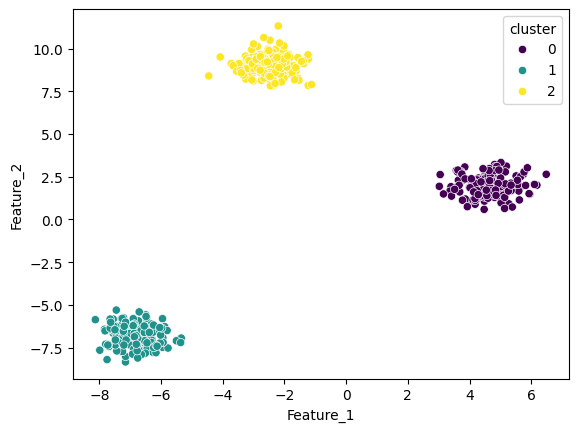

In [44]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['cluster'], palette='viridis')